# Project Deliverable - 1  
**Subject:** Advanced Big Data and Data Mining (MSCS 634)  
**Student Name:** Chandra Kiran Billingi


In [255]:
# importing the necessary libraries to work on the data set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [256]:
# Loading dataset into pandas library for preprocessing
df = pd.read_csv('cardekho.csv')

# Preview data
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


                                  Exploring the Data

In [257]:
#shape of the data set
df.shape

(8128, 12)

In [258]:
#columns in the data set
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [259]:
#columns in the data set with their types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


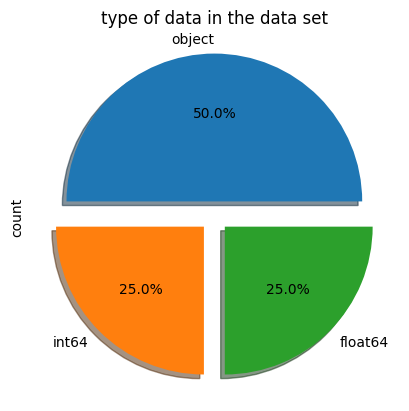

In [260]:
#pie chart of the data set with the types of data set
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('type of data in the data set');

In [261]:
#The description of the data set
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907.000000,7907.000000,7913,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,NaN,NaN,320,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,74,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,NaN,NaN,377,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,19.418783,1458.625016,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,4.037145,503.916303,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,16.780000,1197.000000,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,19.300000,1248.000000,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,22.320000,1582.000000,NaN,5.000000


                                            Data Cleaning

In [262]:
#printing all the missing values in the data set and the number of rows tat were missing
df.isnull().sum()


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


In [263]:
# percentage of the missing values
df.isnull().sum()/len(df)*100

,0
name,0.000000
year,0.000000
selling_price,0.000000
km_driven,0.000000
fuel,0.000000
seller_type,0.000000
transmission,0.000000
owner,0.000000
mileage(km/ltr/kg),2.718996
engine,2.718996


so we can see that 2.71 % of the mileage,engine and the seats data are missing and the 2.71% of the max_power

In [264]:
# Handline Missing Mileage values

df['mileage(km/ltr/kg)'].describe()

,mileage(km/ltr/kg)
count,7907.000000
mean,19.418783
std,4.037145
min,0.000000
25%,16.780000
50%,19.300000
75%,22.320000
max,42.000000


In [265]:
# replacing the empty values with mean
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())


In [266]:
df.engine.describe()

,engine
count,7907.000000
mean,1458.625016
std,503.916303
min,624.000000
25%,1197.000000
50%,1248.000000
75%,1582.000000
max,3604.000000


In [267]:
# replacing the empty values with mean
df.engine= df.engine.fillna(df.engine.mean())


In [268]:
df.seats.describe()

,seats
count,7907.000000
mean,5.416719
std,0.959588
min,2.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,14.000000


In [269]:
# replacing the empty values with max
df.seats= df.seats.fillna(df.seats.max())


In [270]:
df.max_power.describe()

,max_power
count,7913
unique,320
top,74
freq,377


In [271]:
# replacing the empty values with mode
df['max_power'] = df['max_power'].fillna(df['max_power'].mode()[0])

                                      Verification

In [272]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0


From the above we can see that there are no missing values in the data

                                      Removing Duplicate Rows

In [273]:
# Count the number of duplicate Rows
print("Number of duplicate rows:", df.duplicated().sum())

# Remove all the duplicates
df = df.drop_duplicates()


Number of duplicate rows: 1202


                          Outlier Detection and Removal using IQR

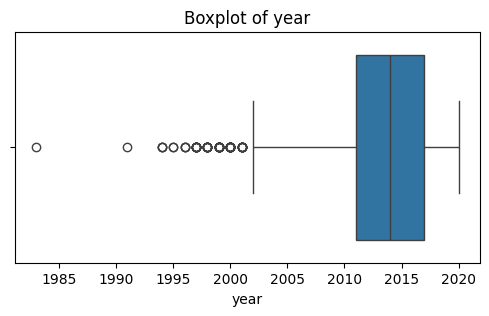

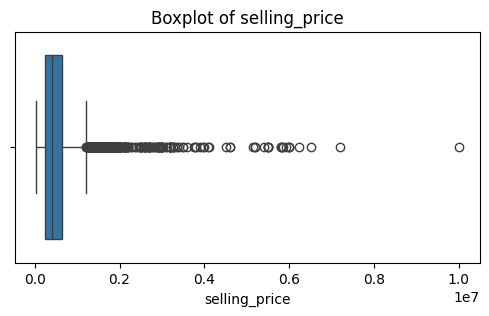

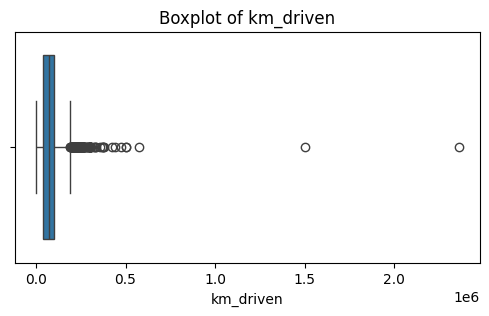

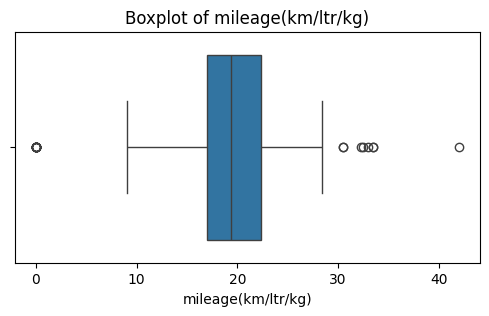

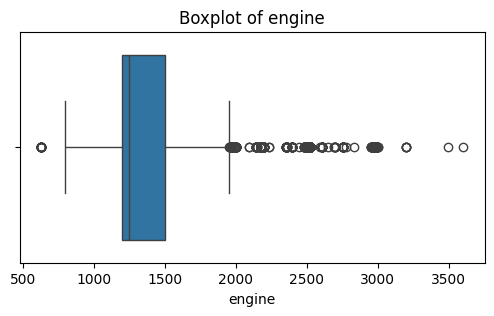

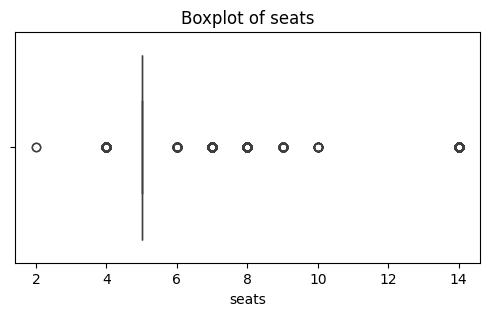

In [274]:
#Box Plots of the data set
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots for all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [275]:
#function for the removal of IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before = df.shape[0]
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after = df_filtered.shape[0]
    print(f"{column}: Removed {before - after} outliers")
    return df_filtered


In [276]:
# Create a copy before outlier treatment
df_cleaned = df.copy()

# List of columns with outliers
columns_with_outliers = ['year', 'selling_price', 'km_driven', 'mileage(km/ltr/kg)', 'engine', 'seats']

# Remove outliers one by one
for col in columns_with_outliers:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)


year: Removed 77 outliers
selling_price: Removed 323 outliers
km_driven: Removed 163 outliers
mileage(km/ltr/kg): Removed 21 outliers
engine: Removed 833 outliers
seats: Removed 623 outliers


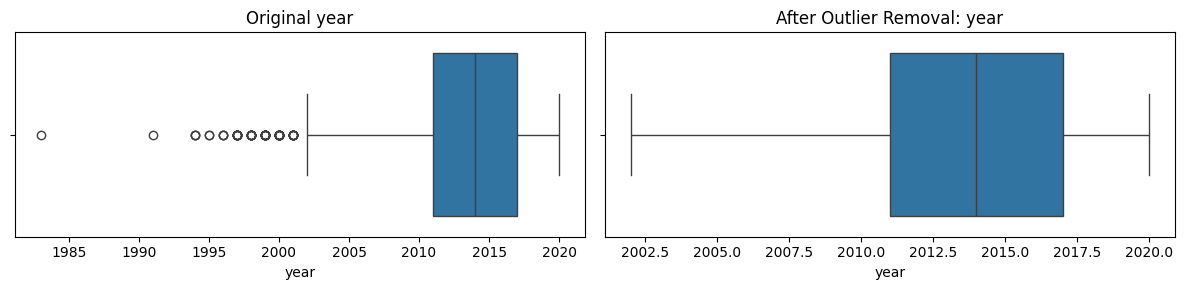

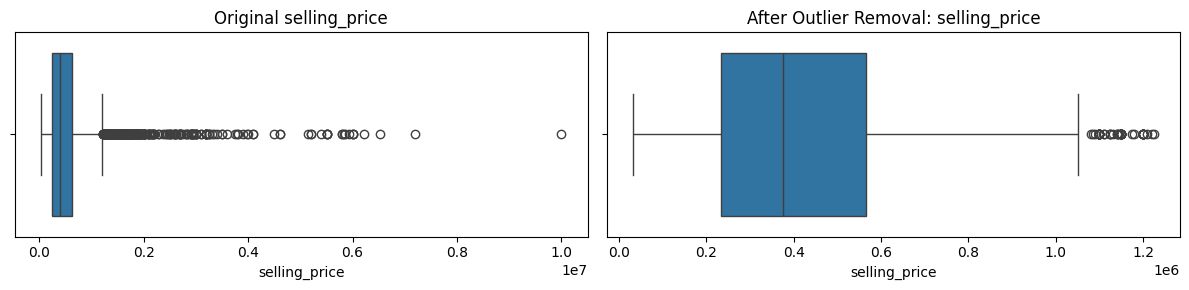

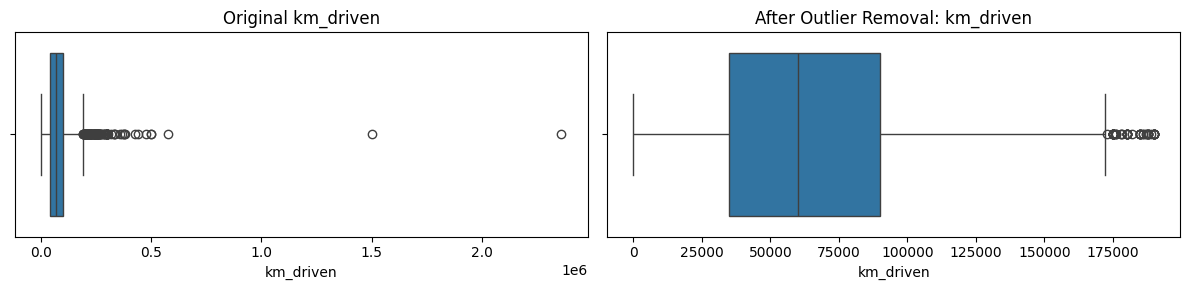

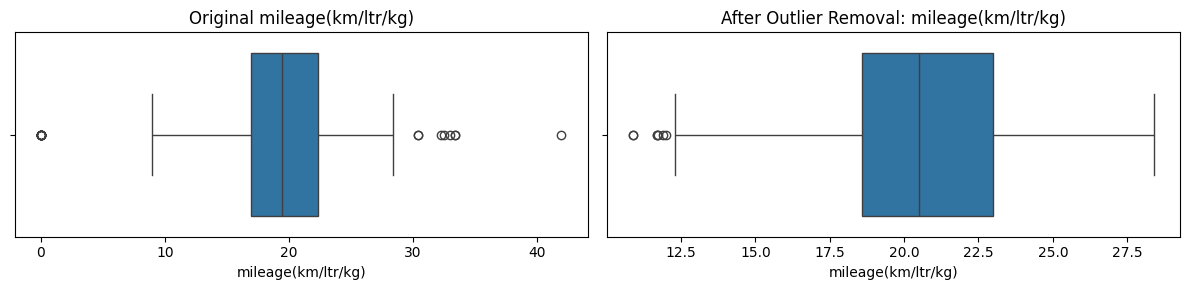

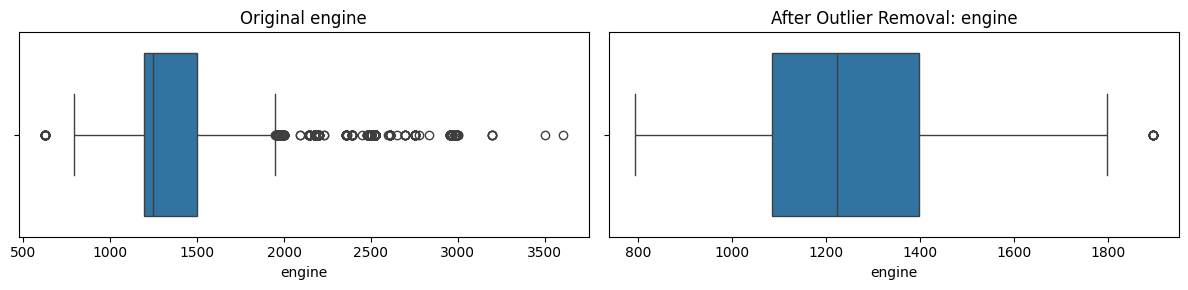

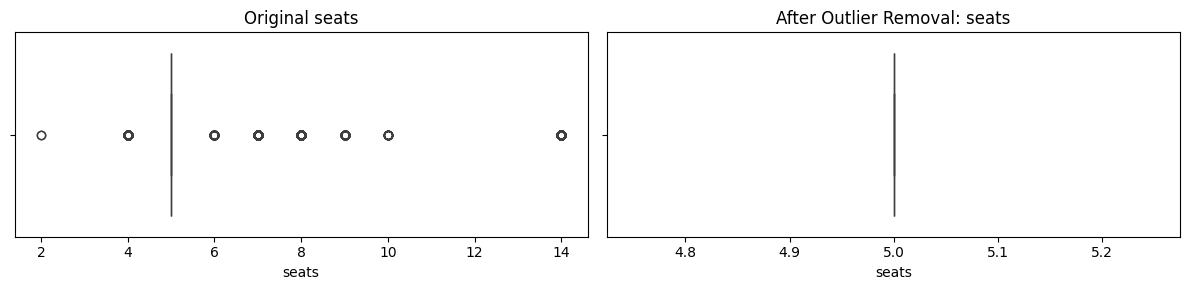

In [277]:
# Comparision of the original and the replaced values in the data set before and after IQR
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize original vs cleaned for a column
for col in columns_with_outliers:
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))

    sns.boxplot(data=df, x=col, ax=axes[0])
    axes[0].set_title(f"Original {col}")

    sns.boxplot(data=df_cleaned, x=col, ax=axes[1])
    axes[1].set_title(f"After Outlier Removal: {col}")

    plt.tight_layout()
    plt.show()


                                      Data Visualization

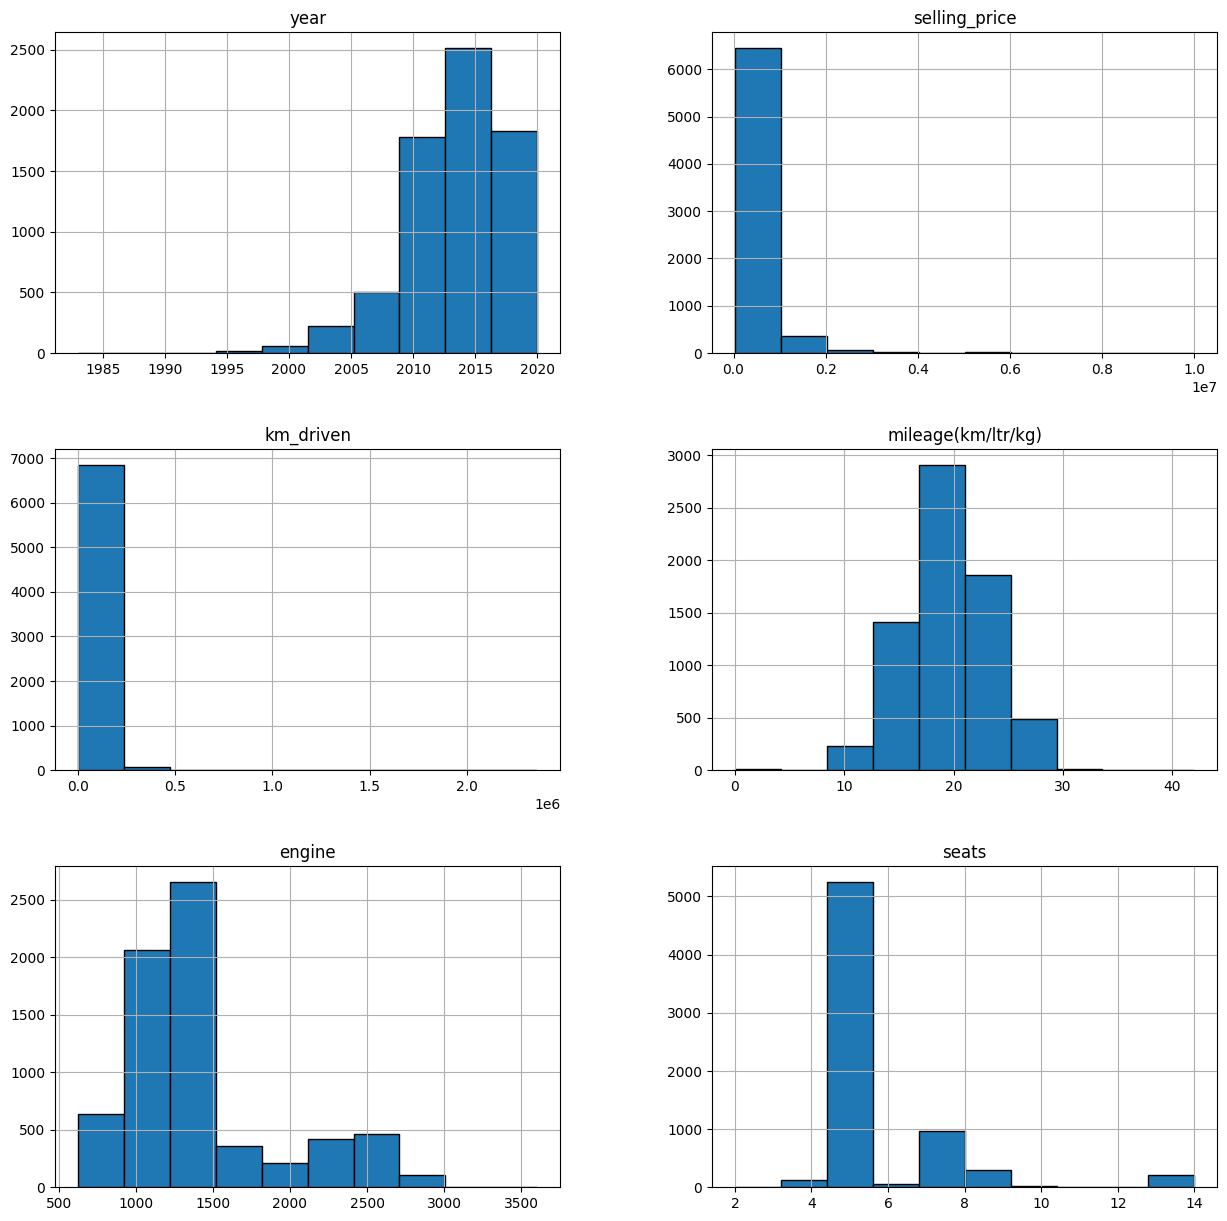

In [278]:
# plotting the histogram of the numerical variables in the data set
df.hist(figsize=(15,15),edgecolor='black');

<Axes: xlabel='engine', ylabel='Count'>

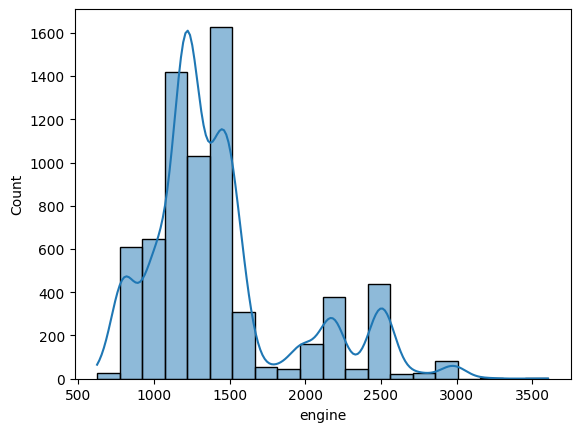

In [279]:
# plot of the engine values and its count
sns.histplot(df['engine'], kde=True, bins=20)


<Axes: xlabel='km_driven', ylabel='Count'>

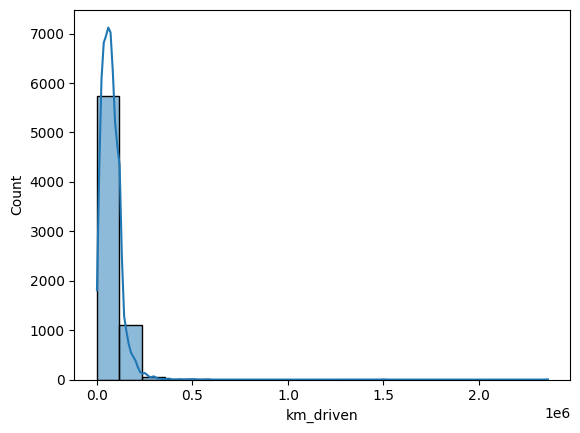

In [280]:
#plot of the the number of cars avaiable in the data with their kms-driven
sns.histplot(df['km_driven'], kde=True, bins=20)


<Axes: xlabel='max_power', ylabel='Count'>

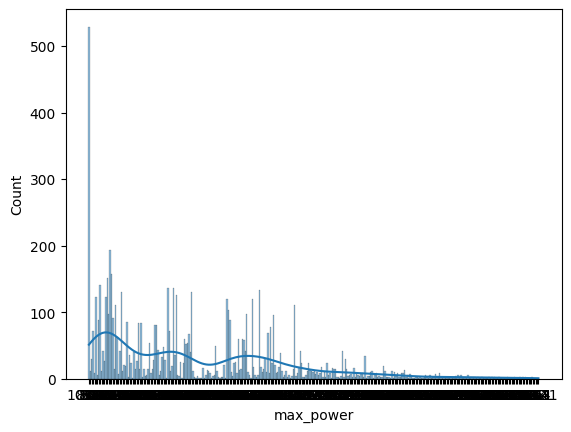

In [281]:
#plot of the macx_power and their counts
sns.histplot(df['max_power'], kde=True, bins=20)


<Axes: xlabel='year', ylabel='Count'>

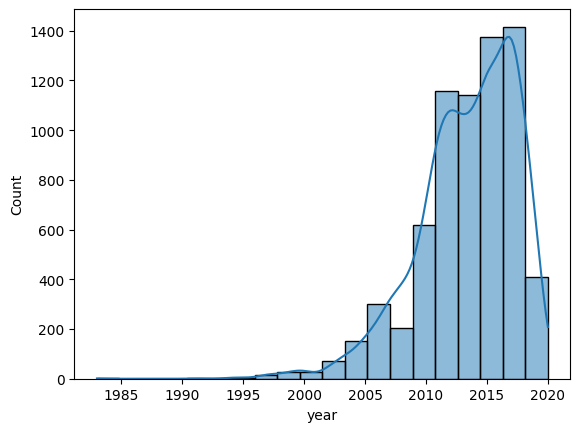

In [282]:
# plot of the year the number by count
sns.histplot(df['year'], kde=True, bins=20)


<Axes: xlabel='mileage(km/ltr/kg)', ylabel='Count'>

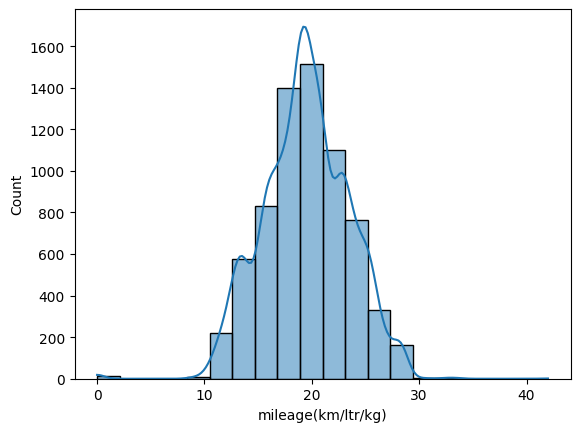

In [283]:
sns.histplot(df['mileage(km/ltr/kg)'], kde=True, bins=20)


<Axes: xlabel='year', ylabel='count'>

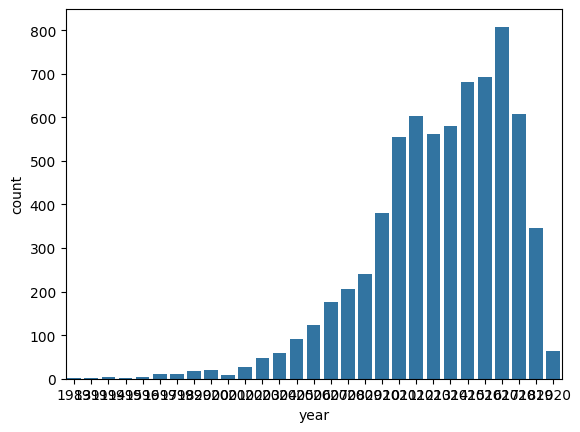

In [284]:
sns.countplot(x='year',data=df,)

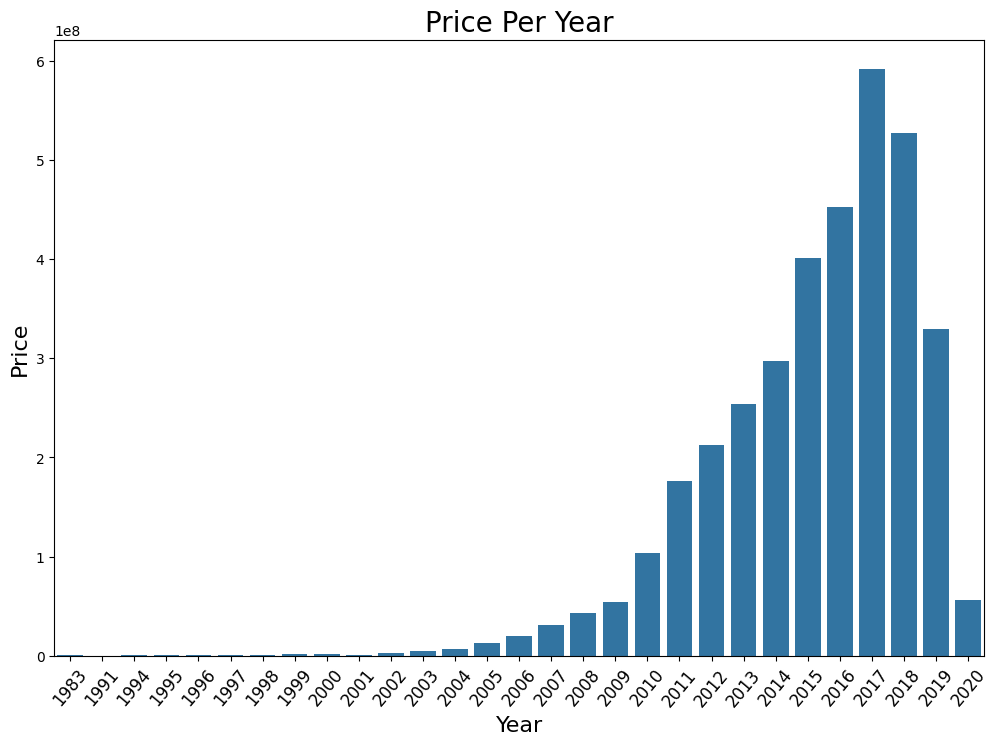

In [285]:
y = df.groupby(['year']).sum()
y = y['selling_price']
x = y.index.astype(int)

plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x)
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='Price', fontsize=16)
ax.set_title(label='Price Per Year', fontsize=20)
plt.show();

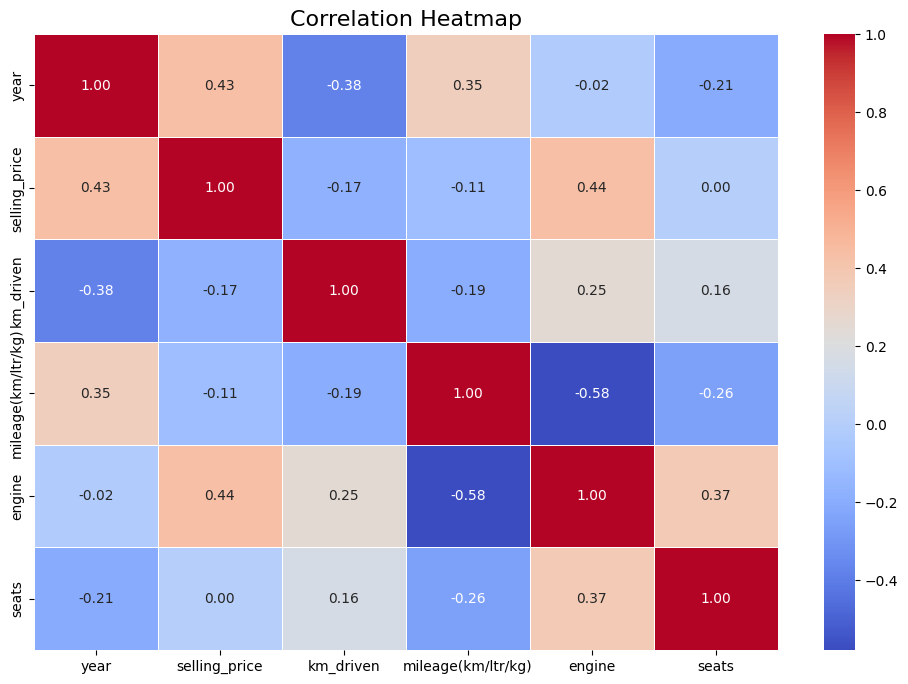

In [286]:

# Computing the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Seting the size of the plot
plt.figure(figsize=(12, 8))

# Generating the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Adding a title
plt.title('Correlation Heatmap', fontsize=16)

# Showing the plot
plt.show()


**Insights Gained from EDA and Their Impact on Future Modeling**

During the exploratory data analysis (EDA) process, I have observed several things from the  dataset:

*Data Quality and Missing Values*

I have identified missing values in critical columns such as mileage, engine, and max_power. These missing values need to be handled carefully, either by imputation or removal, to prevent bias or errors in the model.

*Outliers and Data Distribution*

Outliers were detected in numeric features such as selling_price, year, and km_driven. These extreme values may skew the model’s learning and predictions. Applying outlier treatment techniques like IQR filtering or transformations will improve model robustness.


*Feature Relationships and Correlations*

Strong correlations were observed between features such as engine and max_power, while some features showed low correlation with the target variable (selling_price). This insight will help in feature selection, potentially reducing dimensionality by dropping irrelevant or redundant variables.

*Data Imbalance*

Certain categories (e.g., vehicle ownership types) were imbalanced, which may influence model bias. Addressing class imbalance through resampling or weighting may be necessary, especially for classification tasks.



**How These Insights Will Guide Future Modeling Steps**

*Data Cleaning*: We will impute or remove missing values thoughtfully, ensuring minimal loss of information and avoiding bias.



*Outlier Treatment:* Before modeling, we will apply techniques to handle outliers such as winsorization or transformations to stabilize variance.



*Feature Engineering and Encoding:* Categorical features will be encoded properly to allow models to interpret them. We may also create interaction terms or polynomial features if needed.



*Feature Selection:* Based on correlation and importance analysis, we will select the most relevant features to improve model performance and reduce overfitting.



*Model Choice and Evaluation:* The understanding of data distribution and imbalance will guide our choice of algorithms and evaluation metrics, such as considering tree-based models that handle non-linear relationships and metrics that address class imbalanc

  # Project Deliverable - 2  


                                          Feature Engineering

In [287]:
# Drop the  rows with missing values which wont drop any as there are no missing values
df = df.dropna()


# One-hot encoding categorical features
df_encoded = pd.get_dummies(df, drop_first=True)


# Separate features and target for the better model perfoarmance
X = df_encoded.drop('selling_price', axis=1)
y = df_encoded['selling_price']

# Scaling the  features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [288]:
#Data Splitting into test and train data

from sklearn.model_selection import train_test_split

# Train-test split with 80 and 20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


                                      Linear Regression

In [289]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict


In [290]:
# For the simple linear regression we are making the mileage as a single feature which will predict the target value
# Simple linear regression 1 feature with 5 fold cross validation

# Only 'mileage(km/ltr/kg)' as predictor
X_simple = df_encoded[['mileage(km/ltr/kg)']]
y = df_encoded['selling_price']

# Scaling the mileage feature
X_simple_scaled = StandardScaler().fit_transform(X_simple)

# Linear regression Model
model_simple = LinearRegression()

# KFold setup for the cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# These variables arte delcared for the use of comparison plot
actuals = []
preds_simple = []

In [291]:
# Evaluating the model performance using MAE, MSE, RMSE, and R²
# Initialize metric lists

# Evaluation metrics
mae_simple, mse_simple, rmse_simple, r2_simple = [], [], [], []

# Cross-validation loop
for train_idx, test_idx in kf.split(X_simple_scaled):
    X_train, X_test = X_simple_scaled[train_idx], X_simple_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model_simple.fit(X_train, y_train)
    y_pred = model_simple.predict(X_test)

    actuals.extend(y_test)
    preds_simple.extend(y_pred)

    mae_simple.append(mean_absolute_error(y_test, y_pred))
    mse_simple.append(mean_squared_error(y_test, y_pred))
    rmse_simple.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_simple.append(r2_score(y_test, y_pred))

# Printing the values
print(" Simple Linear Regression (Mileage Only)")
print(f"Avg MAE : {np.mean(mae_simple):.2f}")
print(f"Avg MSE : {np.mean(mse_simple):.2f}")
print(f"Avg RMSE: {np.mean(rmse_simple):.2f}")
print(f"Avg R²  : {np.mean(r2_simple):.4f}")

 Simple Linear Regression (Mileage Only)
Avg MAE : 295558.94
Avg MSE : 267462513462.61
Avg RMSE: 515875.99
Avg R²  : 0.0093


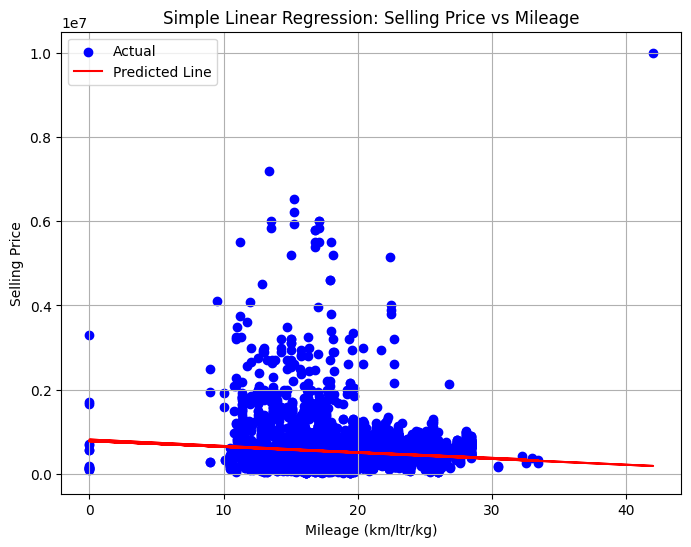

In [292]:
#plot of the linear regression selling price vs mileage
plt.figure(figsize=(8, 6))
plt.scatter(X_simple, y, color='blue', label='Actual')      # actual data points
plt.plot(X_simple, y_pred_lr, color='red', label='Predicted Line')  # predicted line
plt.xlabel("Mileage (km/ltr/kg)")
plt.ylabel("Selling Price")
plt.title("Simple Linear Regression: Selling Price vs Mileage")
plt.legend()
plt.grid(True)
plt.show()


***Description:***


Scatter plot of actual selling prices vs predicted values using only one feature (e.g., mileage).

**Insights:**

The values are spread vety Widely which is a vertical spread indicates that predictions vary significantly from true values.

The model is underfitting, as one feature is not enough to explain variance in selling_price.

R² value is very low (~0.2–0.3), which confirms limited explanatory power.

                                  Multiple Regression

In [293]:
# Train-test split using all features as multiple regression uses all the fearures for the training and understanding of the model
# multiple linear regression is linear regression with multiple features

# Preparing the data
X_all = df_encoded.drop('selling_price', axis=1)
y = df_encoded['selling_price']

# Scaling all features as it is a multiple regression
scaler_multi = StandardScaler()
X_all_scaled = scaler_multi.fit_transform(X_all)


# 5-Fold KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model and metrics
model_multi = LinearRegression()
mae_multi, mse_multi, rmse_multi, r2_multi = [], [], [], []

# Storing predictions and actuals for plotting which will be used by for the comparision plots of both models
preds_multi = []
actuals_multi = []



In [294]:
# Evaluating the model performance using MAE, MSE, RMSE, and R²

# Cross-validation loop
for train_idx, test_idx in kf.split(X_all_scaled):
    X_train, X_test = X_all_scaled[train_idx], X_all_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model_multi.fit(X_train, y_train)
    y_pred = model_multi.predict(X_test)

    # Store predictions and actuals for plot
    preds_multi.extend(y_pred)
    actuals_multi.extend(y_test)

    # Calculate errors
    mae_multi.append(mean_absolute_error(y_test, y_pred))
    mse_multi.append(mean_squared_error(y_test, y_pred))
    rmse_multi.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_multi.append(r2_score(y_test, y_pred))

# Final averaged metrics
print("\n Multiple Linear Regression (All Features with 5-Fold CV)")
print(f"Avg MAE : {np.mean(mae_multi):.2f}")
print(f"Avg MSE : {np.mean(mse_multi):.2f}")
print(f"Avg RMSE: {np.mean(rmse_multi):.2f}")
print(f"Avg R²  : {np.mean(r2_multi):.4f}")


 Multiple Linear Regression (All Features with 5-Fold CV)
Avg MAE : 120006.11
Avg MSE : 114797407787.52
Avg RMSE: 317342.43
Avg R²  : 0.5407


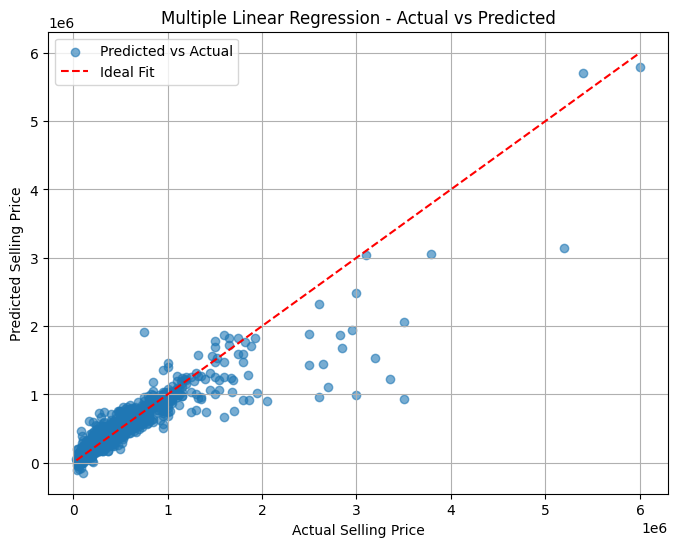

In [295]:
#Visualization
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Multiple Linear Regression - Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

***Description:***
Scatter plot comparing predicted prices vs actual values using all features.

**Insights:**

Points are closer to the ideal line (45° diagonal), showing improved predictive performance.

Indicates that adding features like engine, year, fuel, and others captures more variance in the target.

Still some scatter — suggesting possible noise or non-linearity that linear regression can’t capture.



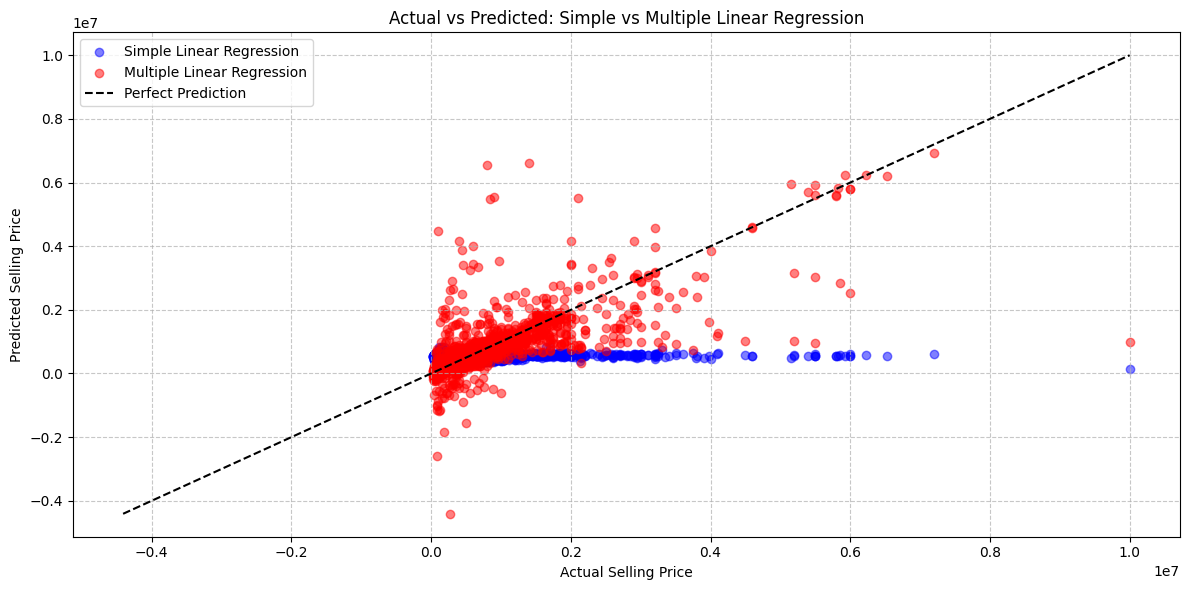

In [296]:
# --------------------- COMPARISON PLOT ---------------------

#convert the actual values into the numpy arrays
actuals = np.array(actuals)
preds_simple = np.array(preds_simple)
preds_multi = np.array(preds_multi)

plt.figure(figsize=(12, 6))
plt.scatter(actuals, preds_simple, color='blue', alpha=0.5, label='Simple Linear Regression')
plt.scatter(actuals, preds_multi, color='red', alpha=0.5, label='Multiple Linear Regression')

# Perfect prediction line
min_val = min(actuals.min(), preds_simple.min(), preds_multi.min())
max_val = max(actuals.max(), preds_simple.max(), preds_multi.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted: Simple vs Multiple Linear Regression')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

***Description:*** Scatter plot comparing predicted prices vs actual values for the linear and multiple Regression

**Insights**:

From the above plot we can observe that the points of the multiple regression are more closer to the ideal line than the linear regression
which concludes that the multiple regression has out performed the linear regression

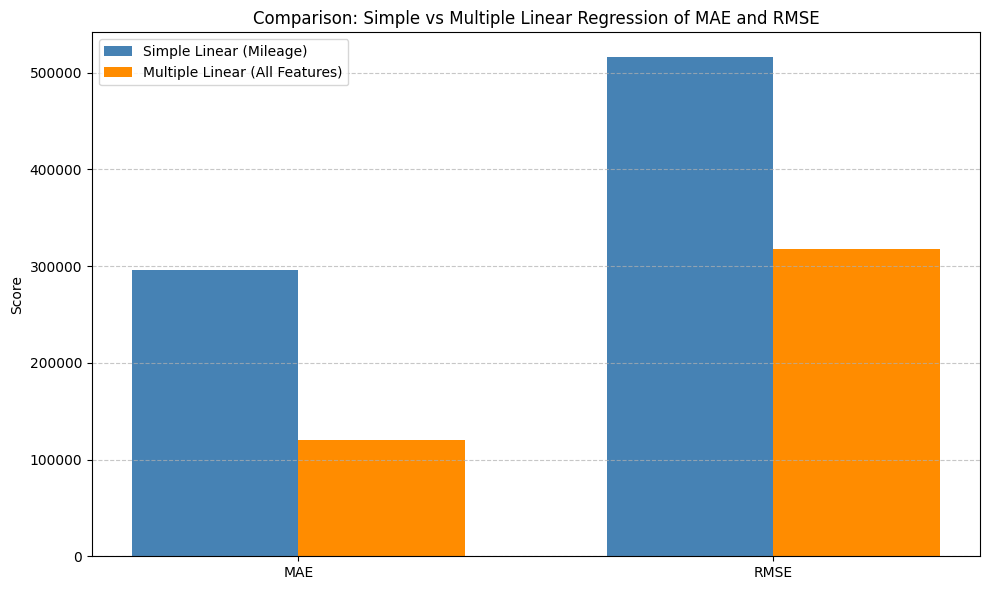

In [297]:
# comparision plot of simple Linear regression vs Multiple regression of their MAE and RMSE


# values of simple regression
mae_simple = 295558.94
rmse_simple = 515875.99

# values of Multiple regression
mae_multi = 120006.11
rmse_multi = 317342.43



# Labels and values
metrics = ['MAE', 'RMSE']
simple_scores = [mae_simple, rmse_simple]
multi_scores = [mae_multi, rmse_multi]
# Bar chart setup
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, simple_scores, width, label='Simple Linear (Mileage)', color='steelblue')
plt.bar(x + width/2, multi_scores, width, label='Multiple Linear (All Features)', color='darkorange')

plt.ylabel('Score')
plt.title('Comparison: Simple vs Multiple Linear Regression of MAE and RMSE')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


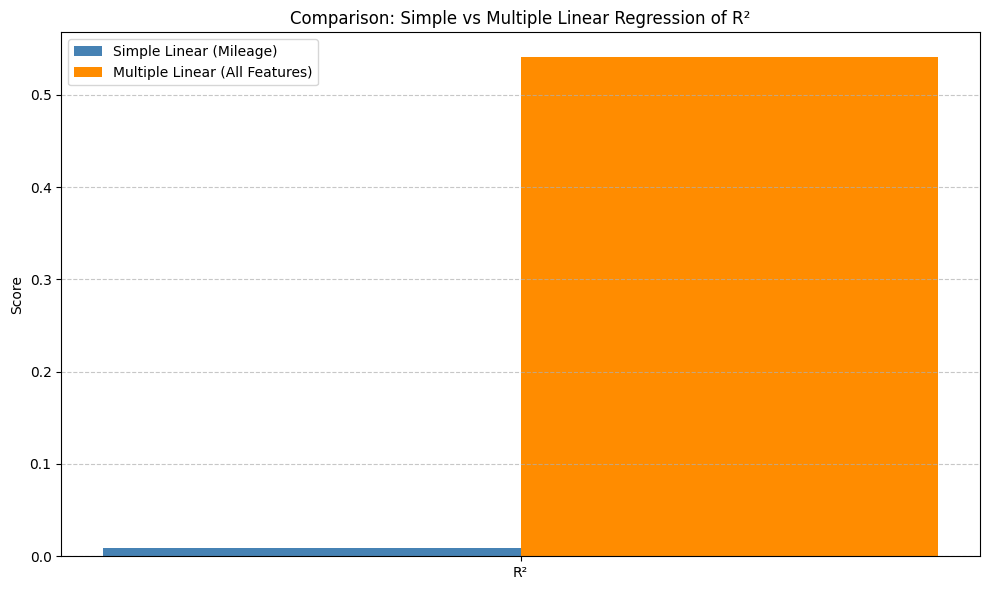

In [298]:
#Comparing R² seperately as the values are much smaller in comaprision to MAE and RMSE
# so its not ideal to add them in a samle plot


r2_simple = 0.0093

r2_multi =  0.5407


# Labels and values
metrics = ['R²']
simple_scores = [r2_simple]
multi_scores = [r2_multi]

# Bar chart setup
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, simple_scores, width, label='Simple Linear (Mileage)', color='steelblue')
plt.bar(x + width/2, multi_scores, width, label='Multiple Linear (All Features)', color='darkorange')

plt.ylabel('Score')
plt.title('Comparison: Simple vs Multiple Linear Regression of R²')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



                                Regularization with Ridge and Lasso Regression

In [299]:
# Ridge model with 5-Fold Cross-Validation

# Preparing the data for the regularization
X_all = df_encoded.drop('selling_price', axis=1)
y_all = df_encoded['selling_price']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

# K-Fold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Ridge model
ridge = Ridge(alpha=1.0)


In [300]:
# Metric lists
mae_list, mse_list, rmse_list, r2_list = [], [], [], []
ridge_preds = []
ridge_actuals = []

# Cross Validation loop
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_all.iloc[train_idx], y_all.iloc[test_idx]

    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)

    ridge_preds.extend(y_pred)
    ridge_actuals.extend(y_test)

    mae_list.append(mean_absolute_error(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_list.append(r2_score(y_test, y_pred))

# Ridge results
print("\n Ridge Regression Results")
print(f"Avg MAE : {np.mean(mae_list):.2f}")
print(f"Avg MSE : {np.mean(mse_list):.2f}")
print(f"Avg RMSE: {np.mean(rmse_list):.2f}")
print(f"Avg R²  : {np.mean(r2_list):.4f}")



 Ridge Regression Results
Avg MAE : 99933.99
Avg MSE : 71680145194.21
Avg RMSE: 264095.41
Avg R²  : 0.7371


In [301]:
# Lasso model with 5-Fold Cross-Validation

#scaling the values for better evaluation using the standard scaler
# Preparing the  data
X_all = df_encoded.drop('selling_price', axis=1)
y_all = df_encoded['selling_price']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

lasso_cv = LassoCV(cv=5, max_iter=3000)
lasso_cv.fit(X_scaled, y_all)

# K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)



In [302]:
# Metric lists
mae_list, mse_list, rmse_list, r2_list = [], [], [], []
lasso_preds = []
lasso_actuals = []

# Cross validation loop
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_all.iloc[train_idx], y_all.iloc[test_idx]

    lasso = Lasso(alpha=lasso_cv.alpha_, max_iter=3000)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)

    lasso_preds.extend(y_pred)
    lasso_actuals.extend(y_test)

    mae_list.append(mean_absolute_error(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_list.append(r2_score(y_test, y_pred))

# Lasso results
print("\n Lasso Regression Results")
print(f"Best Alpha: {lasso_cv.alpha_:.4f}")
print(f"Avg MAE   : {np.mean(mae_list):.2f}")
print(f"Avg MSE   : {np.mean(mse_list):.2f}")
print(f"Avg RMSE  : {np.mean(rmse_list):.2f}")
print(f"Avg R²    : {np.mean(r2_list):.4f}")


 Lasso Regression Results
Best Alpha: 1582.1309
Avg MAE   : 104138.23
Avg MSE   : 78093605113.67
Avg RMSE  : 275587.59
Avg R²    : 0.7148


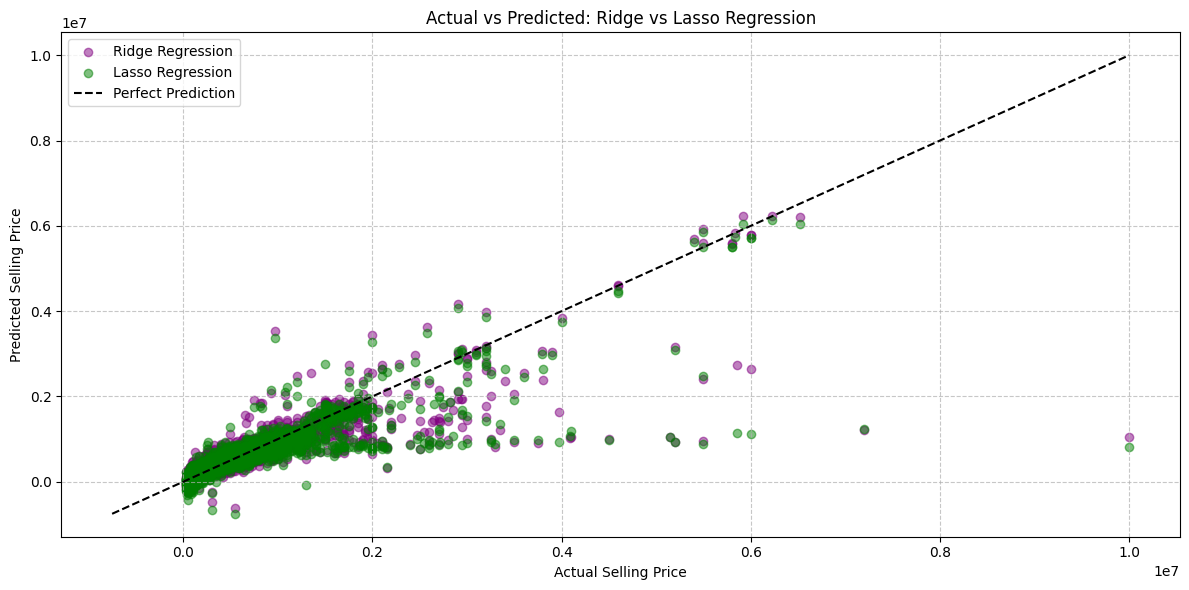

In [303]:
# Comparision plot of ridge and lasso models
# Convert to arrays for plotting
ridge_preds = np.array(ridge_preds)
ridge_actuals = np.array(ridge_actuals)
lasso_preds = np.array(lasso_preds)
lasso_actuals = np.array(lasso_actuals)

plt.figure(figsize=(12, 6))

plt.scatter(ridge_actuals, ridge_preds, alpha=0.5, label="Ridge Regression", color='purple')
plt.scatter(lasso_actuals, lasso_preds, alpha=0.5, label="Lasso Regression", color='green')

# Perfect prediction line
min_val = min(ridge_actuals.min(), lasso_actuals.min(), ridge_preds.min(), lasso_preds.min())
max_val = max(ridge_actuals.max(), lasso_actuals.max(), ridge_preds.max(), lasso_preds.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted: Ridge vs Lasso Regression")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**Description:**
Scatter plot of predicted vs actual values using Ridge Regression and lasso with all features.

Insights:

**Ridge:**

Even tighter clustering near the ideal line compared to regular linear regression.

which indicates  that Ridge handles multicollinearity and overfitting better.

R² is higher, and RMSE/MAE are lower, making it the best-performing model among every other.


**Lasso:**


Performance is close to Ridge, but Lasso introduces sparsity (sets some coefficients to zero).

This makes it great for feature selection, which helps us in identify which features really matter.

Slightly less accurate than Ridge but more interpretable.

                      **Conclusion derived from the plots and the results**




Features which strongly influenced selling_price.

Top features:

year (positive)

engine (positive)

max_power (positive)

km_driven (negative)

Some features (e.g., owner, torque)  have less influence in the final result

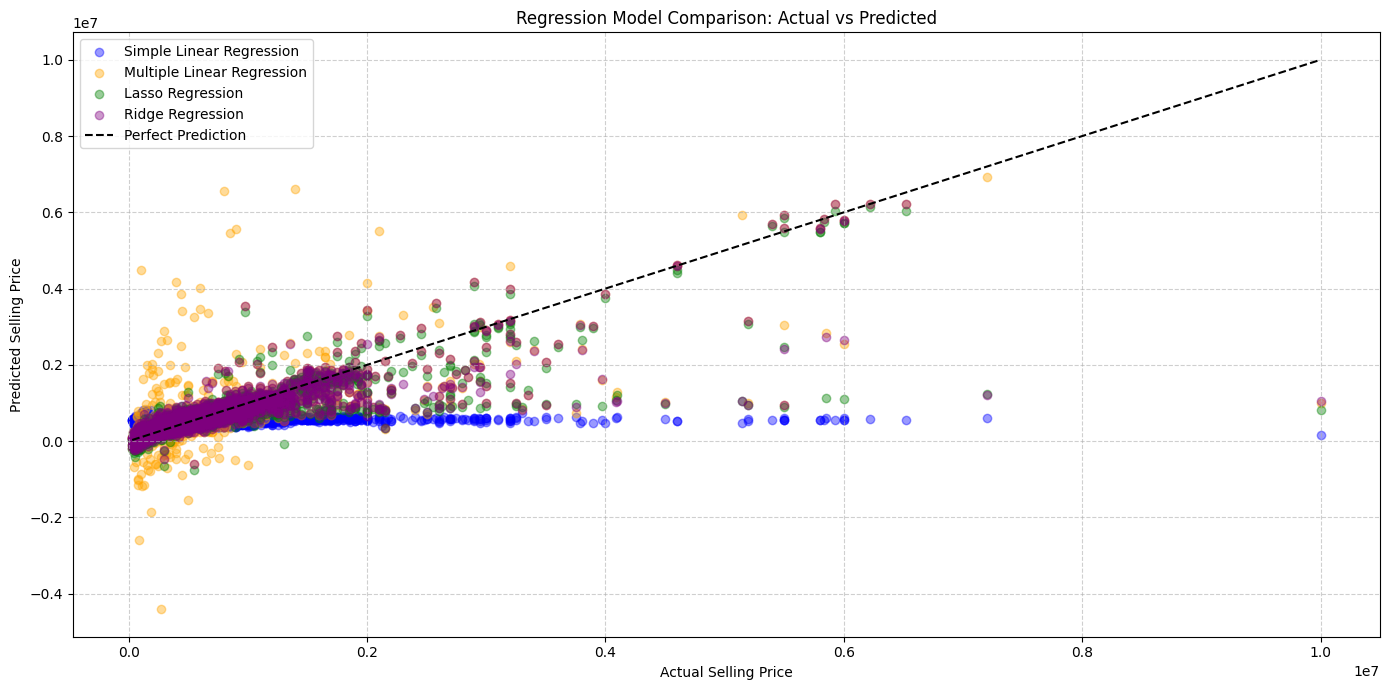

In [304]:
# Ensure all are numpy arrays
actuals_simple = np.array(actuals)
preds_simple = np.array(preds_simple)

actuals_multi = np.array(actuals_multi)
preds_multi = np.array(preds_multi)

lasso_actuals = np.array(lasso_actuals)
lasso_preds = np.array(lasso_preds)

ridge_actuals = np.array(ridge_actuals)
ridge_preds = np.array(ridge_preds)

# Setup plot
plt.figure(figsize=(14, 7))

# Plot each model's predictions
plt.scatter(actuals_simple, preds_simple, alpha=0.4, label='Simple Linear Regression', color='blue')
plt.scatter(actuals_multi, preds_multi, alpha=0.4, label='Multiple Linear Regression', color='orange')
plt.scatter(lasso_actuals, lasso_preds, alpha=0.4, label='Lasso Regression', color='green')
plt.scatter(ridge_actuals, ridge_preds, alpha=0.4, label='Ridge Regression', color='purple')

# Perfect prediction line
min_val = min(actuals_simple.min(), actuals_multi.min(), lasso_actuals.min(), ridge_actuals.min())
max_val = max(actuals_simple.max(), actuals_multi.max(), lasso_actuals.max(), ridge_actuals.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

# Labels and styling
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Regression Model Comparison: Actual vs Predicted")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

                                    ***Overall Insights from Comparision of  Graphs***



**Model Comparison by Visual Quality:**

Simple Linear Regression shows scattered predictions (poor fit).

Multiple Regression improves alignment but may still suffer from multicollinearity.

Ridge Regression gives the best fit visually and numerically.

Lasso Regression helps in feature reduction and performs nearly as well as Ridge.

**Error Patterns:**

In all models, extreme values (very low or high prices) which show the greater prediction errors.

Regularized models (Ridge, Lasso) handled the  outliers more robustly.

Feature Relevance:

Strongest drivers of car price: Year, Engine, Max Power

Least impactful: Possibly Owner type, some fuel types, and seats